# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# pip install citypy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [76]:
# pip install citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

622

# Perform API Calls

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude
lat = []
temp = []
Humidity= []
Cloudiness = []
Wind_Speed =[]
number = 1

print(f"Begining Data Retrieval:\n-----------------------------")
# Loop through the list of cities and perform a request for data on each
 
for city in cities:
    try:
        response = requests.get(query_url + (city)).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"Processing Record {number} - {city}")
        number=number+1
    except KeyError:
        print('An error occurred skipping.. ')
        lat.append("N/A")
        temp.append("N/A")
        Humidity.append("N/A")
        Cloudiness.append("N/A")
        Wind_Speed.append("N/A")
        number=number+1
#         pass
print('complete')
        

# response

Begining Data Retrieval:
-----------------------------
Processing Record 1 - yellowknife
Processing Record 2 - ancud
Processing Record 3 - punta arenas
Processing Record 4 - ushuaia
Processing Record 5 - carnarvon
Processing Record 6 - belyy yar
Processing Record 7 - saint-louis
Processing Record 8 - airai
Processing Record 9 - chuy
Processing Record 10 - srandakan
Processing Record 11 - castro
Processing Record 12 - brae
Processing Record 13 - kuala terengganu
Processing Record 14 - saskylakh
Processing Record 15 - payo
Processing Record 16 - kendari
Processing Record 17 - butaritari
Processing Record 18 - port elizabeth
Processing Record 19 - barrow
Processing Record 20 - vaini
Processing Record 21 - nanortalik
An error occurred skipping.. 
Processing Record 23 - sitka
Processing Record 24 - mapiripan
Processing Record 25 - pital
Processing Record 26 - ibicui
An error occurred skipping.. 
Processing Record 28 - bengkulu
Processing Record 29 - upernavik
An error occurred skipping.. 
P

Processing Record 252 - zhigansk
Processing Record 253 - tucurui
Processing Record 254 - vila franca do campo
Processing Record 255 - kieta
Processing Record 256 - ulladulla
Processing Record 257 - ahipara
Processing Record 258 - kapiri mposhi
Processing Record 259 - luanda
Processing Record 260 - atambua
Processing Record 261 - chambersburg
Processing Record 262 - cap malheureux
Processing Record 263 - lorengau
Processing Record 264 - tobol
An error occurred skipping.. 
Processing Record 266 - yumaguzino
Processing Record 267 - torbay
An error occurred skipping.. 
Processing Record 269 - dhidhdhoo
Processing Record 270 - ishinomaki
Processing Record 271 - olafsvik
An error occurred skipping.. 
Processing Record 273 - bowen
Processing Record 274 - northam
Processing Record 275 - tautira
Processing Record 276 - hasaki
Processing Record 277 - somerset west
Processing Record 278 - bilma
An error occurred skipping.. 
Processing Record 280 - bethel
Processing Record 281 - namatanai
Processi

Processing Record 500 - yerbogachen
Processing Record 501 - energeticheskiy
Processing Record 502 - aksarka
Processing Record 503 - sirnak
Processing Record 504 - nueve de julio
Processing Record 505 - sistranda
Processing Record 506 - eyl
Processing Record 507 - wiang sa
Processing Record 508 - colwyn bay
Processing Record 509 - ikom
An error occurred skipping.. 
Processing Record 511 - sheksna
Processing Record 512 - bulaevo
An error occurred skipping.. 
Processing Record 514 - saryozek
Processing Record 515 - hobyo
Processing Record 516 - zvishavane
Processing Record 517 - torrington
Processing Record 518 - gayny
Processing Record 519 - west bend
Processing Record 520 - venice
Processing Record 521 - tutoia
Processing Record 522 - nouakchott
Processing Record 523 - warrnambool
An error occurred skipping.. 
An error occurred skipping.. 
Processing Record 526 - arucas
Processing Record 527 - fukue
Processing Record 528 - sabha
Processing Record 529 - tartagal
Processing Record 530 - n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
weather_dict = {
    "city": cities,
    "lat": lat,
    "max temp": temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('weather_data.csv')
weather_data.head(15)

,city,lat,max temp,Humidity,Cloudiness,Wind Speed
0,yellowknife,62.46,21.11,60,75,4.1
1,ancud,-41.87,10.56,87,90,7.7
2,punta arenas,-53.15,3,81,75,5.7
3,ushuaia,-54.8,4,69,75,3.88
4,carnarvon,-24.87,17,82,0,6.2
5,belyy yar,53.6,13.68,90,100,1.76
6,saint-louis,16.33,33.83,45,66,1.8
7,airai,-8.93,10.91,75,37,1.08
8,chuy,-33.7,14.73,74,86,1.23
9,srandakan,-7.94,22.86,88,86,2


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
NA=weather_data.lat != 'N/A'
NA.head(15)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: lat, dtype: bool

In [81]:
# Extract relevant fields from the data frame
clean_weather_data=weather_data[NA]
clean_weather_data['temp']=weather_data['max temp']

# len(clean_weather_data)
# Export the City_Data into a csv
clean_weather_data.to_csv('clean_weather_data.csv')
clean_weather_data.head(15)

C:\Users\phill\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,lat,max temp,Humidity,Cloudiness,Wind Speed,temp
0,yellowknife,62.46,21.11,60,75,4.1,21.11
1,ancud,-41.87,10.56,87,90,7.7,10.56
2,punta arenas,-53.15,3,81,75,5.7,3
3,ushuaia,-54.8,4,69,75,3.88,4
4,carnarvon,-24.87,17,82,0,6.2,17
5,belyy yar,53.6,13.68,90,100,1.76,13.68
6,saint-louis,16.33,33.83,45,66,1.8,33.83
7,airai,-8.93,10.91,75,37,1.08,10.91
8,chuy,-33.7,14.73,74,86,1.23,14.73
9,srandakan,-7.94,22.86,88,86,2,22.86


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

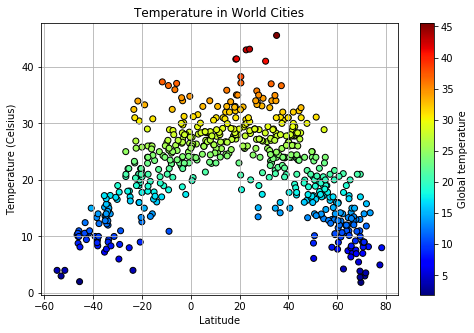

In [83]:
# Build a scatter plot for each data type
plt.figure(figsize=(8,5)) 
plt.scatter(clean_weather_data["lat"], clean_weather_data["max temp"], marker="o", 
            edgecolors="black", c=clean_weather_data["temp"], cmap='jet')

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
clb = plt.colorbar()
clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

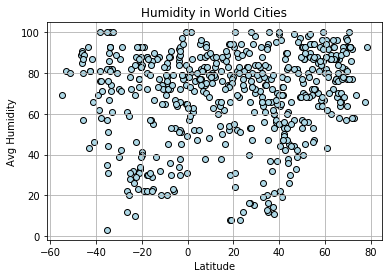

In [84]:
plt.scatter(clean_weather_data["lat"], clean_weather_data["Humidity"], marker="o", 
            edgecolors="black", color='lightblue')

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Avg Humidity")
plt.xlabel("Latitude")
# clb = plt.colorbar()
# clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

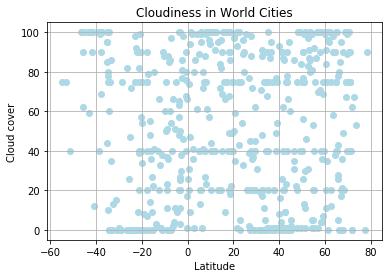

In [85]:
plt.scatter(clean_weather_data["lat"], clean_weather_data["Cloudiness"], marker="o", color='lightblue')

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloud cover")
plt.xlabel("Latitude")
# clb = plt.colorbar()
# clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

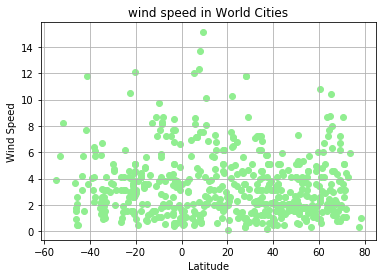

In [86]:
plt.scatter(clean_weather_data["lat"], clean_weather_data["Wind Speed"], marker="o", color='lightgreen')

# Incorporate the other graph properties
plt.title("wind speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# clb = plt.colorbar()
# clb.set_label("Global temperature")
plt.grid(True)

# Save the figure
plt.savefig("windInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [87]:
# OPTIONAL: Create a function to create Linear Regression plots

In [88]:
# Create Northern and Southern Hemisphere DataFrames
north = clean_weather_data['lat']>=0
north_df = clean_weather_data[north]

south = clean_weather_data['lat']<=0
south_df = clean_weather_data[south]

north_df.head(10)

,city,lat,max temp,Humidity,Cloudiness,Wind Speed,temp
0,yellowknife,62.46,21.11,60,75,4.1,21.11
5,belyy yar,53.6,13.68,90,100,1.76,13.68
6,saint-louis,16.33,33.83,45,66,1.8,33.83
11,brae,60.4,16,82,11,10.8,16
12,kuala terengganu,5.33,26,94,40,0.5,26
13,saskylakh,71.92,11.84,77,0,1.65,11.84
16,butaritari,3.07,28.1,76,86,3.94,28.1
18,barrow,71.29,3,86,40,3.1,3
20,nanortalik,60.14,7.74,80,99,3.44,7.74
22,sitka,57.05,21,64,1,1.7,21


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

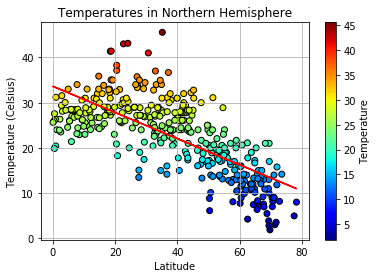

In [89]:
plt.scatter(north_df["lat"], north_df["max temp"], marker="o", 
            edgecolors="black", c=north_df["temp"], cmap='jet')

plt.title("Temperatures in Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
clb = plt.colorbar()
clb.set_label("Temperature")
plt.grid(True)

# plot regression line
x_values = north_df["lat"].astype(float)
y_values = north_df["max temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Save the figure
plt.savefig("TemperatureInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

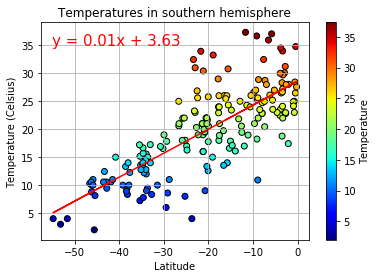

In [90]:
plt.scatter(south_df["lat"], south_df["max temp"], marker="o", 
            edgecolors="black", c=south_df["temp"], cmap='jet')

plt.title("Temperatures in southern hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
clb = plt.colorbar()
clb.set_label("Temperature")
plt.grid(True)


# calculate regression line
x_values = south_df["lat"].astype(float)
y_values = south_df["max temp"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15, color="red")


# Save the figure
plt.savefig("TemperatureInnorthhemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

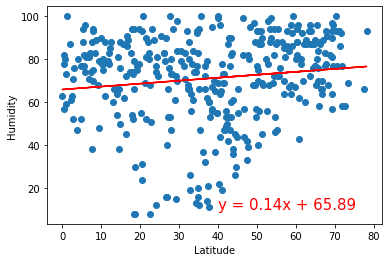

In [91]:
x_values = north_df["lat"].astype(float)
y_values = north_df["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("HumidityInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

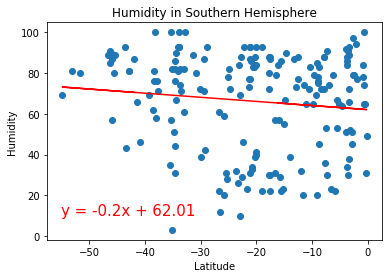

In [92]:
x_values = south_df["lat"].astype(float)
y_values = south_df["Humidity"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity in Southern Hemisphere')

# Save the figure
plt.savefig("HumidityInsouthernHemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

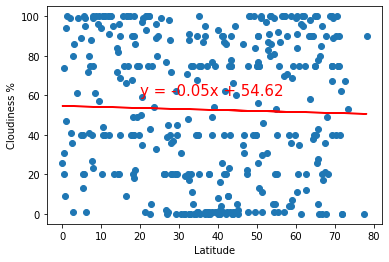

In [93]:
x_values = north_df["lat"].astype(float)
y_values = north_df["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

# Save the figure
plt.savefig("CloudsInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

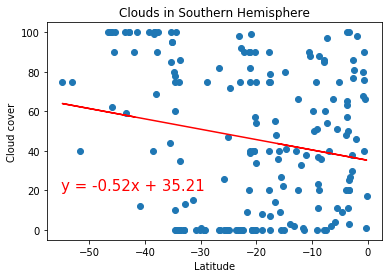

In [94]:
x_values = south_df["lat"].astype(float)
y_values = south_df["Cloudiness"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud cover')
plt.title('Clouds in Southern Hemisphere')

# Save the figure
plt.savefig("CloudsInsouthernHemisphere.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

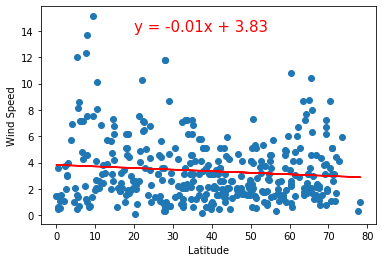

In [95]:
x_values = north_df["lat"].astype(float)
y_values = north_df["Wind Speed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,14),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("WindInnorthhemisphere.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

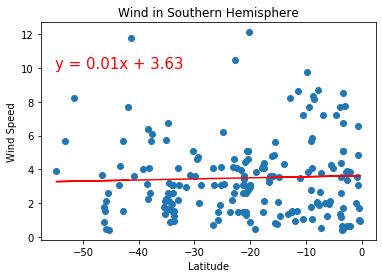

In [96]:
x_values = south_df["lat"].astype(float)
y_values = south_df["Wind Speed"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind in Southern Hemisphere')

# Save the figure
plt.savefig("WibdInsouthernHemisphere.png")

# Show plot
plt.show()